### 4.1: Using the Pandas Library to Read csv Files

In [1]:
import pandas as pd

data = pd.read_csv('happyscore_income.csv')

data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia
...,...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia


In [2]:
happy = data['happyScore']
income = data['avg_income']

happy.max()

7.5870000000000015

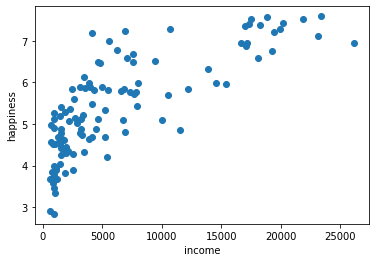

In [3]:
import matplotlib.pyplot as plt

plt.xlabel('income')
plt.ylabel('happiness')
plt.scatter(income, happy)
plt.show()

### 4.1a: Sorting and Filtering Data Using Pandas

In [4]:
data.sort_values('avg_income', inplace=True)  # 'inplace' changes the data, not just return

data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
10,Burundi,25.0,2.9,1.96,572.880,436.92,33.360000,'Sub-Saharan Africa',2.905,0.01530,Burundi
65,Madagascar,33.0,3.7,1.86,574.200,415.48,40.720000,'Sub-Saharan Africa',3.681,0.20824,Madagascar
58,Liberia,37.0,4.4,2.02,653.040,528.72,36.480000,'Sub-Saharan Africa',4.571,0.07120,Liberia
72,Mozambique,34.0,3.8,1.76,714.720,488.52,45.580000,'Sub-Saharan Africa',4.971,0.08308,Mozambique
73,Niger,34.0,3.8,1.75,718.400,535.56,37.726667,'Sub-Saharan Africa',3.845,0.06940,Niger
...,...,...,...,...,...,...,...,...,...,...,...
16,Canada,69.0,8.0,1.71,20190.780,16829.10,33.790000,'North America',7.427,1.32629,Canada
77,Norway,70.0,8.0,1.62,21877.710,19477.62,27.307500,'Western Europe',7.522,1.45900,Norway
105,United States,62.0,7.3,1.92,23127.000,17925.36,41.090000,'North America',7.119,1.39451,United States
17,Switzerland,70.0,8.0,1.62,23400.040,19442.92,32.930000,'Western Europe',7.587,1.39651,Switzerland


In [5]:
# Applying a filter

richest = data[ data['avg_income'] > 15000 ]


richest.iloc[0]


country                             Italy
adjusted_satisfaction                  57
avg_satisfaction                      6.6
std_satisfaction                     1.81
avg_income                        15437.6
median_income                     13163.1
income_inequality                 34.1262
region                   'Western Europe'
happyScore                          5.948
GDP                               1.25114
country.1                           Italy
Name: 49, dtype: object

In [6]:
# Finding the mean of the richest

import numpy as np

rich_mean = np.mean(richest['avg_income'])
all_mean = np.mean(data['avg_income'])

print(all_mean, rich_mean)

6442.75141621464 19266.680753968256


In [7]:
France = data[ data['country']=='France' ]
'\'Western Europe\'' == France['region']

34    True
Name: region, dtype: bool

In [8]:
west_europe = data[ data['region']=='\'Western Europe\'' ]
east_europe = data[ data['region']=='\'Central and Eastern Europe\'' ]

west_income = west_europe['avg_income']
east_income = east_europe['avg_income']

west_happiness = west_europe['happyScore']
east_happiness = east_europe['happyScore']

In [9]:
# Funtion to print random names:
def print_names(dataset, n):
    for i in range(n):
        rand = np.random.randint(len(dataset.index))
        plt.text(dataset.iloc[rand]['avg_income'],
                 dataset.iloc[rand]['happyScore'],
                 dataset.iloc[rand]['country'])

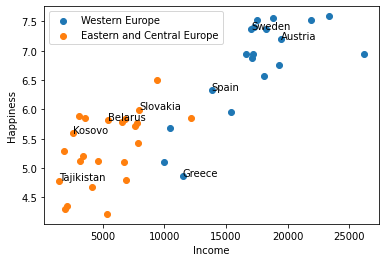

In [10]:
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.scatter(west_income, west_happiness, label="Western Europe")
plt.scatter(east_income, east_happiness,
            label="Eastern and Central Europe")

#printing some random names
print_names(west_europe, 4)
print_names(east_europe, 4)

plt.legend()
plt.show()

# ax = west_europe.plot(kind='scatter', x='avg_income', y='happyScore', label='Western Europe', color='DarkBlue');
# east_europe.plot(ax=ax, kind='scatter', x='avg_income', y='happyScore', label='Eastern Europe', color='orange');
# ax.set_xlabel("Average income")
# ax.set_ylabel("Hapiness")

### 4.2: Eyeballing the Data

In [ ]:
# Adding inequality to the graph

ineq = data['income_inequality']

plt.xlabel('income')
plt.ylabel('happiness')
plt.scatter(income, happy, s=ineq*5, alpha=0.25)

plt.show()

In [ ]:
[plt.text(x=row['avg_income'], y=row['happyScore'],
          s=row['country']) for k,row in data.iterrows()]

### 4.3: Using K-Means to Interpret the Data

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

income_happy = np.column_stack((income, happy))

km_res = KMeans(n_clusters=3).fit(income_happy)

# Calculating the centres of our clusters
clusters = km_res.cluster_centers_

plt.scatter(income, happy)
plt.scatter(clusters[:,0], clusters[:,1], s=5000, alpha=0.25)

plt.show()

In [ ]:
# If we have only one cluster, it's located at the mean

print(clusters)

print(data['avg_income'].mean(), data['happyScore'].mean())

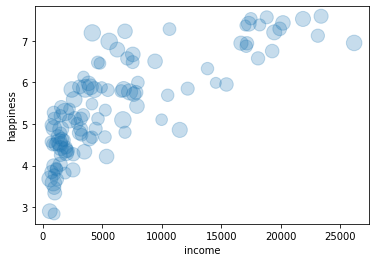

In [41]:
# If we have only one cluster, it's located at the mean

print(clusters)

print(data['avg_income'].mean(), data['happyScore'].mean())

In [ ]:
[plt.text(x=row['avg_income'], y=row['happyScore'],
          s=row['country']) for k,row in data.iterrows()]

### 4.3: Using K-Means to Interpret the Data

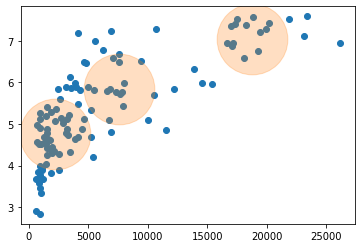

In [73]:
from sklearn.cluster import KMeans
import numpy as np

income_happy = np.column_stack((income, happy))

km_res = KMeans(n_clusters=3).fit(income_happy)

# Calculating the centres of our clusters
clusters = km_res.cluster_centers_

plt.scatter(income, happy)
plt.scatter(clusters[:,0], clusters[:,1], s=5000, alpha=0.25)

plt.show()

In [74]:
# If we have only one cluster, it's located at the mean

print(clusters)

print(data['avg_income'].mean(), data['happyScore'].mean())

[[7.57755711e+03 5.85080769e+00]
 [1.87593022e+04 7.03270000e+00]
 [2.19912121e+03 4.75472308e+00]]
6442.75141621464 5.421909909909911
